In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy


# Random numbers

Numpy let you generate random numbers. Using the random number generators given as examples, implement the functions below.

In [3]:
np.random.normal()

-0.1560750384615752

In [4]:
mu = 10
variance = 2
np.random.normal(mu, variance, size=(3, ))

array([13.73531822,  8.52899912, 11.96711698])

In [5]:
mu = np.zeros((2,))
var = np.eye(2)
np.random.multivariate_normal(mu,var, size=(3,))

array([[-0.06065288, -0.07741954],
       [ 0.46431863,  0.15822343],
       [ 0.40610119,  0.0386874 ]])

In [6]:
p = 0.8
n = 10
np.random.binomial(n, p), np.random.binomial(1, p) # Binomial(n,p), Bernoulli(p)

(8, 1)

In [7]:
np.random.binomial(1, p, size=(5, ))

array([1, 1, 1, 0, 1])

In [8]:
from scipy import linalg

def generate_wishart(n, covariance, k=1):
    """
    Return k Wishart matrices with degrees of freedom n
    and given covariance.
    
    Parameters
    ----------
    n: int
        degrees of freedom
    covariance: np array of shape (p, p)
        covariance matrix
    k: int or None (optional)
        number of wishart matrices to return
    
    Return
    ------
    W: np array of shape (k, p, p)
        k Wishart matrices
    """
    p = covariance.shape[0] 
    mu = np.zeros((p,))
    X = np.random.multivariate_normal(mu, covariance, size =(k,n))
    W = np.asarray([np.dot(X[i].T,X[i]) for i in range(X.shape[0])])
    return W


generate_wishart(5, np.eye(3))

array([[[ 4.08808626,  4.26229626, -0.9611288 ],
        [ 4.26229626,  6.15662844, -3.63035755],
        [-0.9611288 , -3.63035755,  7.59447057]]])

In [9]:
np.random.choice(6) + 1 # roll a die

6

In [10]:
1 + np.random.choice(6, p =[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size=(10, ))  # roll a die 10 times

array([5, 2, 5, 2, 1, 5, 6, 1, 6, 2])

In [11]:
# roll a biased die 10 times
1 + np.random.choice(6, p =[1/10, 1/10, 1/10, 1/10, 1/10, 1/2], size=(10, )) 

array([6, 6, 6, 2, 5, 1, 6, 6, 6, 6])

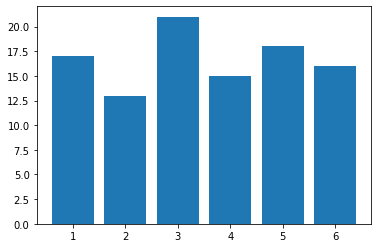

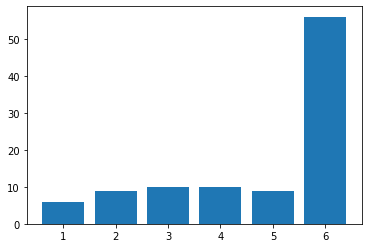

In [12]:
def biased_die_histogram(p, k):
    """
    Draw a biased die with probabilities p, k times, and plot the resulting histograms.
    There should be six bars.
    
    Parameters
    ----------
    p : np array of shape (6,)
        The probabilities associated with each outcome of the dice.
    k: int
        Number of rolls
    """
    die = np.asarray([1,2,3,4,5,6])
    R=np.random.choice(die, p=p, size=(k, ))
    plt.bar(*np.unique(R, return_counts=True))
    plt.show()


biased_die_histogram([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 100)
biased_die_histogram([1/10, 1/10, 1/10, 1/10, 1/10, 1/2], 100)

# SVD, Pseudo-Inverse in numpy

Generate a random matrix A of size (3, 6) with iid N(0,1) entries, and verify that the singular values squared are the eigenvalues of the matrix $A^TA$.

Verify that the pseudo-inverse computed by ``np.linalg.pinv`` is the same as the pseudo-inverse computed from its definition using the SVD.

In [19]:
def test_singular_values_eigenvalues():
    """Test that the square of the singular values of X gives the eigenvalue of X^T.dot(X)
    """
    A = np.random.normal(0,1,(3,6))
    U, s, V  = scipy.linalg.svd(A)
    eigvals, eigvects = scipy.linalg.eig(np.dot(A.T, A))
    print(s**2)
    print(eigvals)
    return A

test_singular_values_eigenvalues()

def test_pinv():
    """Test that computing the pseudo inverse with pinv or via svd gives the same result
    """
    A = np.random.normal(0,1,(3,6))
    return linalg.pinv(A)

test_pinv()

[16.14843125  2.10092368  1.45168688]
[ 1.61484313e+01+0.j  2.10749446e-16+0.j  2.10092368e+00+0.j
  1.45168688e+00+0.j  3.04515848e-16+0.j -5.56723764e-16+0.j]


array([[-0.31780258,  0.22248413,  0.00857   ],
       [ 0.28908349,  0.30830129, -0.30616897],
       [-0.11800516, -0.28462221, -0.1743541 ],
       [ 0.10361107, -0.20544705,  0.08283618],
       [-0.29125062, -0.01658819,  0.08545747],
       [-0.05172226,  0.0504143 , -0.00098096]])

# Boxplots

Using matplotlib, for each $\theta = 1,2,...20$, generate 100 independent copies of a random variable with $N(\theta, \theta^{-1})$ distribution. Plot the generated random variables with boxplots, one boxplot for each value of $\theta$ and the x-axis representing $\theta$.

In [24]:
theta = np.arange(1,21)

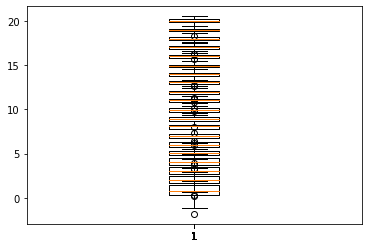

In [49]:
def plot_boxplot_normal_increasing_mean_and_variance():
    """Using matplotlib, for each theta = 1,2,...,20, 
    generate 100 independent copies of a random variable 
    with N(theta, theta^{-1}) distribution. 
    Plot the generated random variables with boxplots, 
    one boxplot for each value of theta and 
    the x-axis representing theta.
    """
    theta = np.arange(1,21)
    RV = np.asarray([np.random.normal(the, 1/np.sqrt(the) , 100) for the in theta])
    for i in range(len(theta)):
        plt.boxplot(RV[i])
    return 
    raise NotImplementedError

plot_boxplot_normal_increasing_mean_and_variance()

# Quantile quantile plots

In order to check visually that a collection of random variables follow a certain distribution, quantile quantile plots are convenient.

In [39]:
n = 10
X = np.random.randint(1000, size=n) # generate n numbers
X_sort = np.sort(X) # sort them
scores  = np.arange(1, n + 1) / (n+1) # their corresponding scores (many other methods are possible)

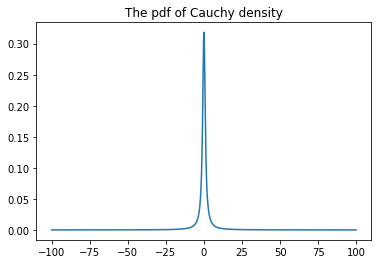

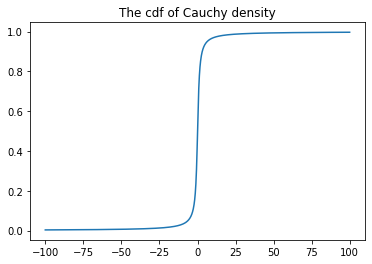

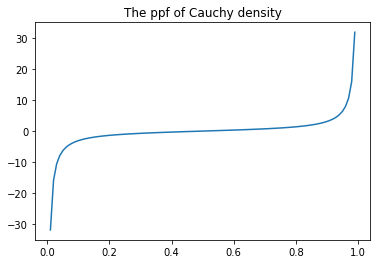

20%, 50% and 60% quantiles: [-1.37638192  0.          0.3249197 ]


In [40]:
# Getting theoretical quantities on distributions
cauchy = scipy.stats.cauchy # many others are available
# the probability density function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The pdf of Cauchy density")
plt.plot(X, cauchy.pdf(X))
plt.show()
# the cumulative distribution function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The cdf of Cauchy density")
plt.plot(X, cauchy.cdf(X))
plt.show()
# the percent point function (inverse of cdf)
X = np.arange(0, 1, 0.01)
plt.figure()
plt.title("The ppf of Cauchy density")
plt.plot(X, cauchy.ppf(X))
plt.show()
# Theoretical 20%, 50% and 60% quantiles of cauchy distribution
quantiles = cauchy.ppf((0.2, 0.5, 0.6))
print("20%, 50% and 60% quantiles:", quantiles)

1. Generate 100 independent copies of N(1,3) random variables and plot the QQ-plot
against the theoretical quantiles of the N(0,1), N(5, 3) and N(1,3) distribution. Superpose on the plot the line y=x.

2. Generate 100 independent copies of chi-square random variables with 5 degrees of freedom,
and compare those aginst the theoretical quantiles of the N(5,1) distribution, the $\chi^2_4$ distribution, the $\chi^2_5$ distribution, the $\chi^2_6$ distribution.Superpose on the plot the line y=x.

In [24]:
def qqplot(data, distribution):
    """
    Generate a qqplot using the quantiles of the data and the theoretical data of the distribution.
    Superpose on the plot the line y=x.
    
    Parameters
    ----------
    data: np array of shape (100,)
        Empirical data
    
    distribution: distribution from scipy.stats
        Theoretical distribution to compare to
    """
    raise NotImplementedError
    
def test_qqplot_sm():
    """
    Test the plot is the same as in sm.qqplot
    """
    X = np.random.normal(0, 1, size=100)
    qqplot(X, scipy.stats.norm)
    sm.qqplot(X, line='45')
    
test_qqplot_sm()

NotImplementedError: 

In [27]:
raise NotImplementedError
# Answer 1.

NotImplementedError: 

In [26]:
# Answer 2.
raise NotImplementedError

NotImplementedError: 

# Generate a simple regression model

Given the sample size n and dimension p, generate a dataset (y, X) where y has size n and X has size n times p,
such that
$y = X \beta^* + \beta_0^* + \epsilon$ where $\epsilon$ has iid $N(0,\sigma^2)$ entries, $X$ has iid $N(0,1)$ entries, and $\beta^*\in R^p$ has norm equal to the signal strength parameter, and $\beta_0^*$ is the intercept.

In [69]:
def linear_regression(X, beta_true, sigma):
    """
    Applies the linear regression model
    
    Parameters
    -----------
    
    X: np array of shape (n, p)
    input features

    beta_true: np array of shape (p)
    true coefficients
    
    sigma: float
    noise standard deviation 

    Return
    ------
    y: np array of shape (n,)
    responses generated accroding to the linear regression model
    y= X beta_star + eps
    """
    raise NotImplementedError

def generate_dataset(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set (with intercept = 0)
    Take beta_star uniformly in the sphere of length: signal_strength
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p)
        Features
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
    """

    X=np.random.multivariate_normal(np.zeros(p), np.eye(p), size = (n,))
    epsilon = np.random.multivariate_normal(np.zeros(n), sigma*np.eye(n))
    b_true = np.random.uniform(size=(p,))
    b_true = signal_strength * b_true / np.linalg.norm(b_true)
    y = np.matmul(X, b_true) + epsilon
    return X, y, b_true

def test_nointercept():
    """
    Check that X.dot(b_true) = y when the noise is 0
    """
    X, y, b_true = generate_dataset(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X.dot(b_true), y)
    
#test_nointercept()

def generate_dataset_with_intercept(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set, same as before, but here the returned array X should have
    p+1 columns, and the first column contains only 1,1,...,1 to accout for
    possible intercept.
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p + 1)
        Features, last column contains only ones
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p + 1,)
        true coefficients (last one is the intercept)
    """

    X=np.random.multivariate_normal(np.zeros(p+1), np.eye(p+1), size = (n,))
    epsilon = np.random.multivariate_normal(np.zeros(n), sigma*np.eye(n))
    b_true = np.random.uniform(size=(p+1,))
    b_true = signal_strength * b_true / np.linalg.norm(b_true)
    y = np.matmul(X, b_true) + epsilon
    return X, y, b_true

    raise NotImplementedError

def test_intercept():
    """
    Check that X.dot(b_true) = y when the noise is 0 and intercept = 0
    """
    X, y, b_true = generate_dataset_with_intercept(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X[:, :-1].dot(b_true[:-1]) + b_true[-1], y)

In [ ]:
generate_dataset(20,1)

In [120]:
np.linalg.norm([1,2], ord=0)

2.0

In [ ]:
test_nointercept()
test_intercept()

# Least-squares

Given a design matrix X and response y,
implement the least-squares estimate $\hat\beta = (X^TX)^\dagger X^Ty$
using several methods:

1. using the SVD of X `np.linalg.svd`
2. using the pseudo-inverse of X `np.linalg.pinv`
3. using the inverse of $X^TX$ if full-rank, and its pseudo-inverse otherwise
4. using `scipy.linalg.lstsq`

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the correct estimate of $\beta$ when there is no noise.

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the same estimate.


In [72]:
X, y, b_true = generate_dataset(n=20, p=10)
X.shape, y.shape, b_true.shape

((20, 10), (20,), (10,))

In [127]:
def compute_least_squares_using_SVD(X, y):
    U, s, V = np.linalg.svd(np.matmul(X.T,X))
    sigma_inv = np.zeros((U.shape[1],V.shape[0]))
    np.fill_diagonal(sigma_inv, 1/s)
    sigma_inv = sigma_inv.T
    pseudo_inv = np.matmul(np.matmul(V.T , sigma_inv), U.T)
    b_hat = np.matmul(pseudo_inv, X.T)
    b_hat = np.matmul(b_hat , y)
    return b_hat
    
def compute_least_squares_using_pseudo_inverse(X, y):
    pseudoinv = np.linalg.pinv(np.matmul(X.T, X))
    return np.matmul(np.matmul(pseudoinv, X.T), y )
    
def compute_least_squares_using_method3(X, y):
    M = np.matmul(X.T, X)
    if np.linalg.matrix_rank(M)==M.shape[0]:
        method3 = np.linalg.inv(M)
        return np.matmul(np.matmul(method3, X.T), y)
    else:
        return compute_least_squares_using_pseudo_inverse(X, y)

def compute_least_squares_using_scipy(X, y):
    M = np.matmul(X.T, X)
    yy= np.matmul(X.T, y)
    beta_hat, *_ = scipy.linalg.lstsq(M, yy)
    return beta_hat
    
def test_lsqr():
    """Test that all methods yield the correct beta when there is no noise
    """
    X, y, b_true = generate_dataset(n = 20, p = 10)
    b_hat = compute_least_squares_using_scipy(X, X.dot(b_true))
    np.testing.assert_allclose(b_true, b_hat)
        
def test_same_estimate():
    """ Test that all methods yield the same estimate of beta
    """
    X, y, b_true = generate_dataset(n = 20, p = 10)
    b_hat1 = compute_least_squares_using_scipy(X, y)
    b_hat2 = compute_least_squares_using_SVD(X, y)
    np.testing.assert_allclose(b_hat2, b_hat1)
        
test_lsqr()
test_same_estimate()

In [85]:
compute_least_squares_using_method3(X, y)

array([ 0.72660513,  0.75761151, -0.74844904,  0.4476486 ,  0.68027319,
        0.59593051,  1.04926337, -0.32721049,  0.24476795,  0.88071352])

# The distribution of the MLE, the residuals, and the loss

By computing 100 independent datasets with $p=10, n=30$, verify with histograms and
QQ-plots that the squared norm $\|y-X\hat\beta\|^2/\sigma^2$ has chi square distribution, and recall its degrees of freedom.

TypeError: %s requires more parameters to compute ppf

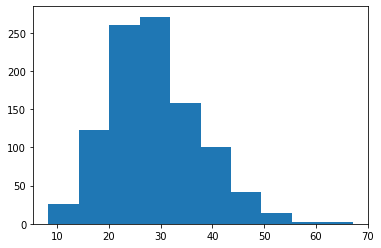

In [147]:
def error_residual_plot():
    N = 1000
    sqnorm = np.zeros(N) 
    sigma_ = 0.7
    for i in range(N):
        X, y, b_true = generate_dataset(n = 30, p = 10, sigma = sigma_)
        b_hat = compute_least_squares_using_scipy(X, y)
        sqnorm[i] = np.linalg.norm(y - X.dot(b_hat))**2 / sigma_**2
    plt.hist(sqnorm)
    sm.qqplot(data = sqnorm, dist = scipy.stats.distributions.chi2)
error_residual_plot()


In [142]:
help(sm.qqplot)

Help on function qqplot in module statsmodels.graphics.gofplots:

qqplot(data, dist=<scipy.stats._continuous_distns.norm_gen object at 0x0000019920B72B50>, distargs=(), a=0, loc=0, scale=1, fit=False, line=None, ax=None, **plotkwargs)
    Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    
    Can take arguments specifying the parameters for dist or fit them
    automatically. (See fit under Parameters.)
    
    Parameters
    ----------
    data : array_like
        A 1d data array.
    dist : callable
        Comparison distribution. The default is
        scipy.stats.distributions.norm (a standard normal).
    distargs : tuple
        A tuple of arguments passed to dist to specify it fully
        so dist.ppf may be called.
    a : float
        Offset for the plotting position of an expected order statistic, for
        example. The plotting positions are given by (i - a)/(nobs - 2*a + 1)
        for i in range(0,nobs+1)
    loc : float
        Location

# The curve of the risk of the MLE in high dimension

1. Fix $n=200$, noise level $\sigma^2=0.7$, signal strength $2$, and a grid of values for $p/n$, say $0.1, 0.2, 0.3, 0.4, ..., 2.9, 3.0$. For each for of $n, p$, generate $10$ independent datasets and plot the boxplots corresponding the squared error $\|\hat\beta - \beta^*\|^2$ for each given ratio $p/n$. If $p>n$, make sure that $\hat\beta$ is the solution $(X^TX)^\dagger X^Ty$. Plot the corresponding theoretical curves for the expected squared error found using the formula for expected inverse Wishart matrices.

2. Bonus: Plot also the boxplots for the the bias and variance of the squared error. 

In [35]:
# Question 1
raise NotImplementedError
# Question 2
raise NotImplementedError

NotImplementedError: 